<a href="https://colab.research.google.com/github/nteuthorn/Thinkful-Capstone-4/blob/master/Capstone_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image classification of food is a topic of interest for health-care related fields, as nutrition plays a huge part in maintaining a healthy lifestyle. Therefore, the “holy grail” of image classification for food in the healthcare industry is to take an image of a dish and to output the nutritional information of that dish. Such a model would allow a patient to take a picture of each of their meals and effortlessly track their nutritional intake. This would be invaluable for patients such as diabetics who have a great need for tracking their nutritional intake. For broader appeal, any health-conscious individual would be interested in tracking their nutritional input, if only it was simple enough. This is a highly complex problem, but a first step has been taken by classifying “food” or “non-food”. But what is the next step in developing this complex model?

I propose that a significant step forward would be taken in classifying the cuisine of the dish in the image. Each cuisine has unique ingredients and nutritional profiles, and therefore classification of the cuisine would provide a lot of information to predict the nutritional content. Therefore, this project will feed image data collected from the Yelp Developers API into a convolutional neural network to create a model that can predict the cuisine of the dish in the image.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# **Data collection from Yelp Developers API**

**Collect food images from Yelp API from 4 cuisine categories (burgers, chinese, italian, mexican) and label (via file sorting system) with applicable cuisine**

In [ ]:
# api_key = 'XGbMoZGg5yy4Ap5FDpUejMacY5OX5Cu9B1I_CatkrctHpxpJ5eSCi6_WM9AAOJoXJhxiJ4PC4K15OjFPidmZQYEvTyuz0eEvXrnvXm5Whcn4MQSuLjqfgJzzKYosX3Yx'
# headers = {'Authorization': 'Bearer %s' % api_key}

# cuisines = ['mexican', 'chinese', 'italian', 'burgers']
# locations = ['New York City', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']

# url = 'https://api.yelp.com/v3/businesses/search'

# mexican_images_train = []
# mexican_images_test = []
# chinese_images_train = []
# chinese_images_test = []
# italian_images_train = []
# italian_images_test = []
# burgers_images_train = []
# burgers_images_test = []

Save mexican food images in drive

In [ ]:
# cuisine = cuisines[0]
# counter = 1

# for loc in locations:

#   for i in range(10):
#     params = {'term': cuisine, 'location': loc, 'limit': 50, 'offset': 50*i}

#     req = requests.get(url, params=params, headers=headers)
#     print(f'The status code is {req.status_code}')

#     parsed = json.loads(req.text)

#     businesses = parsed['businesses']

#     for business in businesses:
#       id = business['id']

#       url2 = 'https://api.yelp.com/v3/businesses/' + id
#       req = requests.get(url2, headers=headers)
#       parsed = json.loads(req.text)
#       photos = parsed['photos']

#       for photo in photos:
        
#         if counter%5 == 0:
#           mexican_images_test.append(photo) 
#           counter += 1
#         else:
#           mexican_images_train.append(photo) 
#           counter += 1

In [ ]:
# for i in range(len(mexican_images_train)):
#   file_url = mexican_images_train[i]
      
#   r = requests.get(file_url, stream = True)  
    
#   with open(f'/content/drive/My Drive/Thinkful/Capstone 3/Data/train/mexican/mexican{i}.jpg', 'wb') as file:  
#       for block in r.iter_content(chunk_size = 1024): 
#           if block:  
#               file.write(block) 

# for i in range(len(mexican_images_test)):
#   file_url = mexican_images_test[i]
      
#   r = requests.get(file_url, stream = True)  
    
#   with open(f'/content/drive/My Drive/Thinkful/Capstone 3/Data/test/mexican/mexican{i}.jpg', 'wb') as file:  
#       for block in r.iter_content(chunk_size = 1024): 
#           if block:  
#               file.write(block) 

Save chinese food images in drive

In [ ]:
# cuisine = cuisines[1]
# counter = 1

# for loc in locations:

#   for i in range(10):
#     params = {'term': cuisine, 'location': loc, 'limit': 50, 'offset': 50*i}

#     req = requests.get(url, params=params, headers=headers)
#     print(f'The status code is {req.status_code}')

#     parsed = json.loads(req.text)

#     businesses = parsed['businesses']

#     for business in businesses:
#       id = business['id']

#       url2 = 'https://api.yelp.com/v3/businesses/' + id
#       req = requests.get(url2, headers=headers)
#       parsed = json.loads(req.text)
#       photos = parsed['photos']

#       for photo in photos:
        
#         if counter%5 == 0:
#           chinese_images_test.append(photo) 
#           counter += 1
#         else:
#           chinese_images_train.append(photo) 
#           counter += 1

In [ ]:
# for i in range(len(chinese_images_train)):
#   file_url = chinese_images_train[i]
      
#   r = requests.get(file_url, stream = True)  
    
#   with open(f'/content/drive/My Drive/Thinkful/Capstone 3/Data/train/chinese/chinese{i}.jpg', 'wb') as file:  
#       for block in r.iter_content(chunk_size = 1024): 
#           if block:  
#               file.write(block) 

# for i in range(len(chinese_images_test)):
#   file_url = chinese_images_test[i]
      
#   r = requests.get(file_url, stream = True)  
    
#   with open(f'/content/drive/My Drive/Thinkful/Capstone 3/Data/test/chinese/chinese{i}.jpg', 'wb') as file:  
#       for block in r.iter_content(chunk_size = 1024): 
#           if block:  
#               file.write(block) 

Save italian food images in drive

In [ ]:
# cuisine = cuisines[2]
# counter = 1

# for loc in locations:

#   for i in range(10):
#     params = {'term': cuisine, 'location': loc, 'limit': 50, 'offset': 50*i}

#     req = requests.get(url, params=params, headers=headers)
#     print(f'The status code is {req.status_code}')

#     parsed = json.loads(req.text)

#     businesses = parsed['businesses']

#     for business in businesses:
#       id = business['id']

#       url2 = 'https://api.yelp.com/v3/businesses/' + id
#       req = requests.get(url2, headers=headers)
#       parsed = json.loads(req.text)
#       photos = parsed['photos']

#       for photo in photos:
        
#         if counter%5 == 0:
#           italian_images_test.append(photo) 
#           counter += 1
#         else:
#           italian_images_train.append(photo) 
#           counter += 1

In [ ]:
# for i in range(len(italian_images_train)):
#   file_url = italian_images_train[i]
      
#   r = requests.get(file_url, stream = True)  
    
#   with open(f'/content/drive/My Drive/Thinkful/Capstone 3/Data/train/italian/italian{i}.jpg', 'wb') as file:  
#       for block in r.iter_content(chunk_size = 1024): 
#           if block:  
#               file.write(block) 

# for i in range(len(italian_images_test)):
#   file_url = italian_images_test[i]
      
#   r = requests.get(file_url, stream = True)  
    
#   with open(f'/content/drive/My Drive/Thinkful/Capstone 3/Data/test/italian/italian{i}.jpg', 'wb') as file:  
#       for block in r.iter_content(chunk_size = 1024): 
#           if block:  
#               file.write(block) 

Save burgers food images in drive

In [ ]:
# cuisine = cuisines[3]
# counter = 1

# for loc in locations:

#   for i in range(10):
#     params = {'term': cuisine, 'location': loc, 'limit': 50, 'offset': 50*i}

#     req = requests.get(url, params=params, headers=headers)
#     print(f'The status code is {req.status_code}')

#     parsed = json.loads(req.text)

#     businesses = parsed['businesses']

#     for business in businesses:
#       id = business['id']

#       url2 = 'https://api.yelp.com/v3/businesses/' + id
#       req = requests.get(url2, headers=headers)
#       parsed = json.loads(req.text)
#       photos = parsed['photos']

#       for photo in photos:
        
#         if counter%5 == 0:
#           burgers_images_test.append(photo) 
#           counter += 1
#         else:
#           burgers_images_train.append(photo) 
#           counter += 1

In [ ]:
# for i in range(3678, len(burgers_images_train)):
#   file_url = burgers_images_train[i]
      
#   r = requests.get(file_url, stream = True)  
    
#   with open(f'/content/drive/My Drive/Thinkful/Capstone 3/Data/train/burgers/burgers{i}.jpg', 'wb') as file:  
#       for block in r.iter_content(chunk_size = 1024): 
#           if block:  
#               file.write(block) 

# for i in range(len(burgers_images_test)):
#   file_url = burgers_images_test[i]
      
#   r = requests.get(file_url, stream = True)  
    
#   with open(f'/content/drive/My Drive/Thinkful/Capstone 3/Data/test/burgers/burgers{i}.jpg', 'wb') as file:  
#       for block in r.iter_content(chunk_size = 1024): 
#           if block:  
#               file.write(block) 

# **Model Building**

## **Data Prep**

Load images and prepare train/test datasets

In [3]:
cuisines = ['burgers', 'chinese', 'italian', 'mexican']

In [4]:
train_data_dir = '/content/drive/MyDrive/Data Science Projects/Thinkful/Completed/Capstone 4/Data/train'
validation_data_dir = '/content/drive/MyDrive/Data Science Projects/Thinkful/Completed/Capstone 4/Data/test'

img_width, img_height = 224, 224
#decrease image input size to decrease overfitting
# img_width, img_height = 150, 150
batch_size = 80

In [5]:
#This block of code is used to ensure the input shape is correct

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [6]:
train_datagen = ImageDataGenerator(
    rescale = 1. /255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1. /255
)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    # shuffle=False,
    class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 300 images belonging to 4 classes.


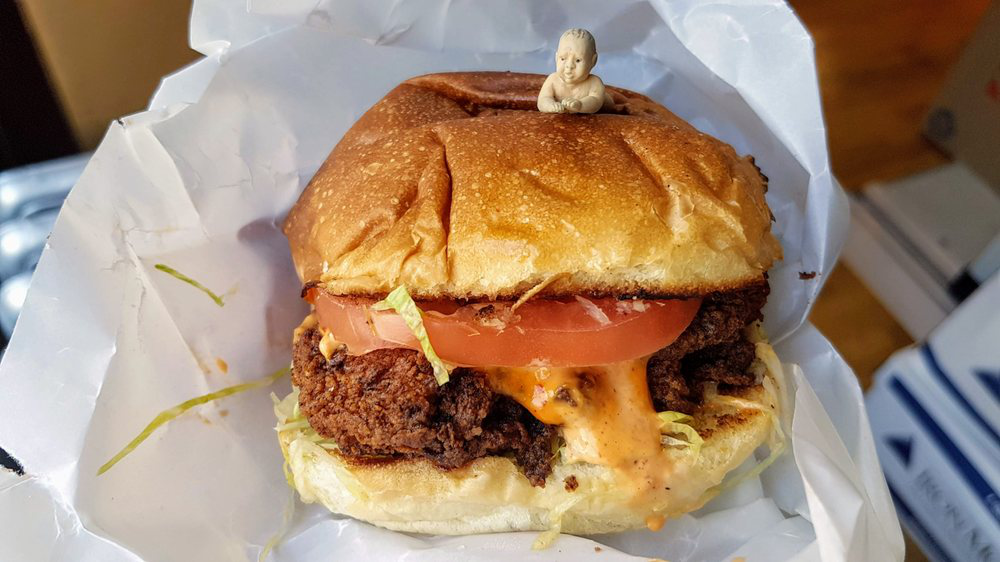

In [8]:
#Example image of "burger" classification

img_path_burger=validation_generator.filepaths[np.where(validation_generator.classes==0)[0][0]]
Image.open(img_path_burger)

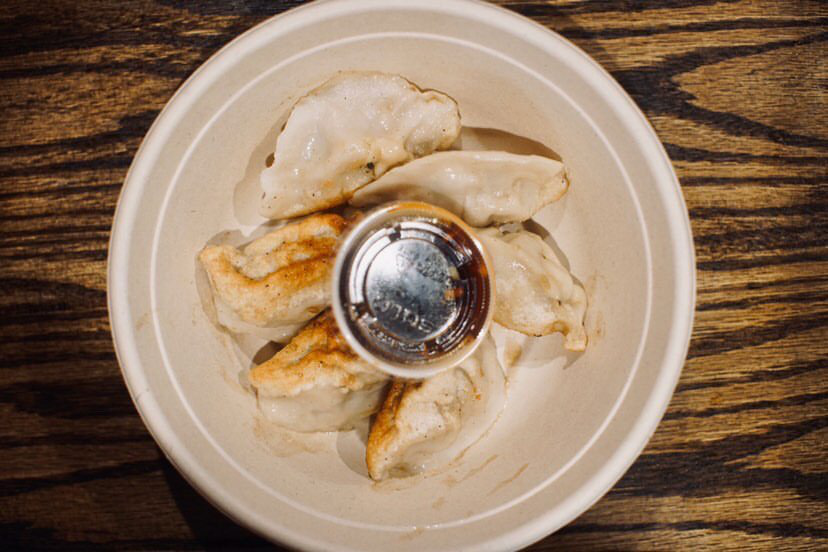

In [ ]:
#Example image of "chinese" classification

img_path_chinese=validation_generator.filepaths[np.where(validation_generator.classes==1)[0][0]]
Image.open(img_path_chinese)

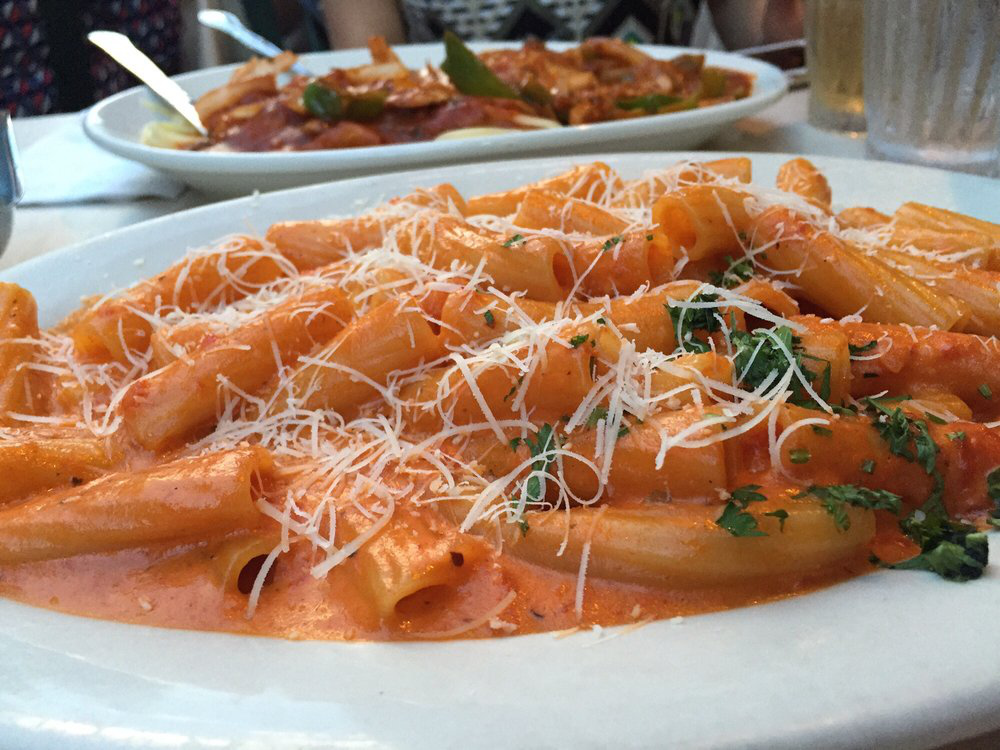

In [ ]:
#Example image of "italian" classification

img_path_italian=validation_generator.filepaths[np.where(validation_generator.classes==2)[0][0]]
Image.open(img_path_italian)

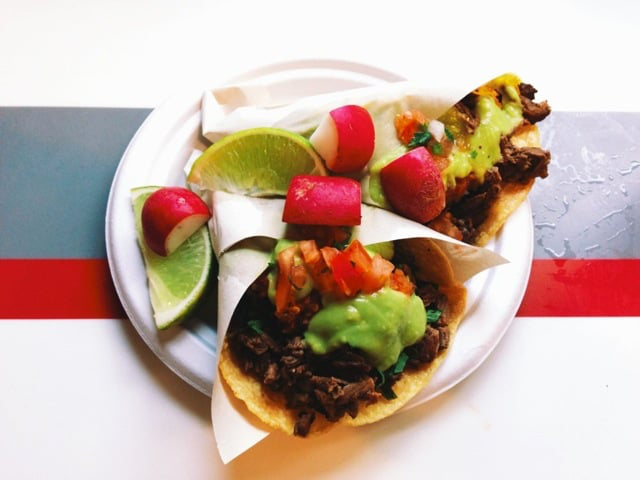

In [ ]:
#Example image of "mexican" classification

img_path_mexican=validation_generator.filepaths[np.where(validation_generator.classes==3)[0][0]]
Image.open(img_path_mexican)

## **Build convolutional neural network model to predict cuisine classification of imported food images**

### **Build Models Manually**

####Shallow model

In [ ]:
model_shallow = Sequential()

model_shallow.add(Conv2D(64, (3,3), input_shape=input_shape))
model_shallow.add(Activation('relu'))
model_shallow.add(MaxPooling2D(pool_size=(3,3)))

model_shallow.add(Flatten())

model_shallow.add(Dense(16))
model_shallow.add(Activation('relu'))

model_shallow.add(Dense(4))
model_shallow.add(Activation('softmax'))

model_shallow.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 153664)            0         
_________________________________________________________________
dense (Dense)                (None, 16)                2458640   
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 6

In [ ]:
model_shallow.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_shallow.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=1
)

Epoch 1/10
20/20 [==============================] - 478s 24s/step - loss: 4.2493 - accuracy: 0.2425 - val_loss: 1.3866 - val_accuracy: 0.2500
Epoch 2/10
20/20 [==============================] - 54s 3s/step - loss: 1.3863 - accuracy: 0.2500 - val_loss: 1.3873 - val_accuracy: 0.2375
Epoch 3/10
20/20 [==============================] - 44s 2s/step - loss: 1.3863 - accuracy: 0.2500 - val_loss: 1.3862 - val_accuracy: 0.2375
Epoch 4/10
20/20 [==============================] - 37s 2s/step - loss: 1.3863 - accuracy: 0.2500 - val_loss: 1.3850 - val_accuracy: 0.2750
Epoch 5/10
20/20 [==============================] - 35s 2s/step - loss: 1.3864 - accuracy: 0.2500 - val_loss: 1.3871 - val_accuracy: 0.2250
Epoch 6/10
20/20 [==============================] - 34s 2s/step - loss: 1.3863 - accuracy: 0.2500 - val_loss: 1.3854 - val_accuracy: 0.2625
Epoch 7/10
20/20 [==============================] - 33s 2s/step - loss: 1.3863 - accuracy: 0.2500 - val_loss: 1.3868 - val_accuracy: 0.2250
Epoch 8/10
20/20 [

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.25      1.00      0.40        75
           2       0.00      0.00      0.00        75
           3       0.00      0.00      0.00        75

    accuracy                           0.25       300
   macro avg       0.06      0.25      0.10       300
weighted avg       0.06      0.25      0.10       300



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


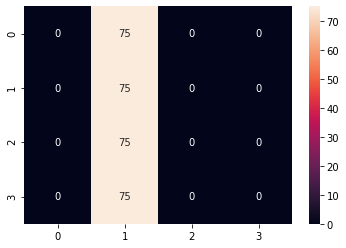

In [ ]:
y_pred_shallow = np.argmax(model_shallow.predict(validation_generator), axis=-1)

print(classification_report(validation_generator.classes, y_pred_shallow))

cf_shallow = confusion_matrix(validation_generator.classes, y_pred_shallow)

sns.heatmap(cf_shallow, annot=True)

####Deep model

In [ ]:
model_deep = Sequential()

model_deep.add(Conv2D(64, (3,3), input_shape=input_shape))
model_deep.add(Activation('relu'))
model_deep.add(MaxPooling2D(pool_size=(2,2)))

model_deep.add(Conv2D(64, (3,3)))
model_deep.add(Activation('relu'))
model_deep.add(MaxPooling2D(pool_size=(3,3)))

model_deep.add(Flatten())

model_deep.add(Dense(64))
model_deep.add(Activation('relu'))

model_deep.add(Dense(16))
model_deep.add(Activation('relu'))

model_deep.add(Dense(4))
model_deep.add(Activation('softmax'))

model_deep.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
activation_3 (Activation)    (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
activation_4 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)            

In [ ]:
model_deep.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_deep.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=1
)

Epoch 1/10
10/10 [==============================] - 19s 2s/step - loss: 1.4668 - accuracy: 0.2650 - val_loss: 1.3850 - val_accuracy: 0.2875
Epoch 2/10
10/10 [==============================] - 18s 2s/step - loss: 1.3865 - accuracy: 0.2562 - val_loss: 1.3861 - val_accuracy: 0.3000
Epoch 3/10
10/10 [==============================] - 18s 2s/step - loss: 1.3858 - accuracy: 0.2600 - val_loss: 1.3982 - val_accuracy: 0.2375
Epoch 4/10
10/10 [==============================] - 18s 2s/step - loss: 1.3872 - accuracy: 0.2738 - val_loss: 1.3870 - val_accuracy: 0.2000
Epoch 5/10
10/10 [==============================] - 18s 2s/step - loss: 1.3862 - accuracy: 0.2488 - val_loss: 1.3821 - val_accuracy: 0.3750
Epoch 6/10
10/10 [==============================] - 18s 2s/step - loss: 1.3847 - accuracy: 0.2875 - val_loss: 1.3838 - val_accuracy: 0.3250
Epoch 7/10
10/10 [==============================] - 18s 2s/step - loss: 1.3841 - accuracy: 0.2675 - val_loss: 1.3907 - val_accuracy: 0.2375
Epoch 8/10
10/10 [==

              precision    recall  f1-score   support

           0       0.29      0.39      0.33        75
           1       0.32      0.24      0.27        75
           2       0.24      0.05      0.09        75
           3       0.24      0.41      0.31        75

    accuracy                           0.27       300
   macro avg       0.27      0.27      0.25       300
weighted avg       0.27      0.27      0.25       300



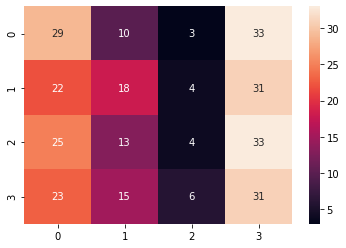

In [ ]:
y_pred_deep = np.argmax(model_deep.predict(validation_generator), axis=-1)

print(classification_report(validation_generator.classes, y_pred_deep))

cf_deep = confusion_matrix(validation_generator.classes, y_pred_deep)

sns.heatmap(cf_deep, annot=True)

Examples of misclassified images with classification:

In [ ]:
i = np.where(validation_generator.classes==0)[0][0]
while validation_generator.classes[i] == 0 and validation_generator.classes[i] == y_pred_deep[i]:
  i += 1

print(f'This {cuisines[0]} food image was misclassified as {cuisines[y_pred_deep[i]]} food.')
img_path_wrong=validation_generator.filepaths[i]
Image.open(img_path_wrong)

In [ ]:
i = np.where(validation_generator.classes==1)[0][0]
while validation_generator.classes[i] == 1 and validation_generator.classes[i] == y_pred_deep[i]:
  i += 1

print(f'This {cuisines[1]} food image was misclassified as {cuisines[y_pred_deep[i]]} food.')
img_path_wrong=validation_generator.filepaths[i]
Image.open(img_path_wrong)

In [ ]:
i = np.where(validation_generator.classes==2)[0][0]
while validation_generator.classes[i] == 0 and validation_generator.classes[i] == y_pred_deep[i]:
  i += 1

print(f'This {cuisines[2]} food image was misclassified as {cuisines[y_pred_deep[i]]} food.')
img_path_wrong=validation_generator.filepaths[i]
Image.open(img_path_wrong)

In [ ]:
i = np.where(validation_generator.classes==3)[0][0]
while validation_generator.classes[i] == 0 and validation_generator.classes[i] == y_pred_deep[i]:
  i += 1

print(f'This {cuisines[3]} food image was misclassified as {cuisines[y_pred_deep[i]]} food.')
img_path_wrong=validation_generator.filepaths[i]
Image.open(img_path_wrong)

In [ ]:
model_deep2 = Sequential()

model_deep2.add(Conv2D(64, (3,3), input_shape=input_shape))
model_deep2.add(Activation('relu'))

model_deep2.add(Conv2D(64, (3,3)))
model_deep2.add(Activation('relu'))
model_deep2.add(MaxPooling2D(pool_size=(2,2)))

model_deep2.add(Conv2D(128, (3,3)))
model_deep2.add(Activation('relu'))

model_deep2.add(Conv2D(128, (3,3)))
model_deep2.add(Activation('relu'))
model_deep2.add(MaxPooling2D(pool_size=(2,2)))

model_deep2.add(Flatten())

model_deep2.add(Dense(64))
model_deep2.add(Activation('relu'))

model_deep2.add(Dense(32))
model_deep2.add(Activation('relu'))

model_deep2.add(Dense(16))
model_deep2.add(Activation('relu'))

model_deep2.add(Dense(4))
model_deep2.add(Activation('softmax'))

model_deep2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
activation_8 (Activation)    (None, 148, 148, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 146, 146, 64)      36928     
_________________________________________________________________
activation_9 (Activation)    (None, 146, 146, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
activation_10 (Activation)   (None, 71, 71, 128)      

In [ ]:
model_deep2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_deep2.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=1
)

Epoch 1/10
10/10 [==============================] - 19s 2s/step - loss: 1.4287 - accuracy: 0.2450 - val_loss: 1.3837 - val_accuracy: 0.2625
Epoch 2/10
10/10 [==============================] - 18s 2s/step - loss: 1.3847 - accuracy: 0.2713 - val_loss: 1.3873 - val_accuracy: 0.2500
Epoch 3/10
10/10 [==============================] - 18s 2s/step - loss: 1.3841 - accuracy: 0.2800 - val_loss: 1.3777 - val_accuracy: 0.3000
Epoch 4/10
10/10 [==============================] - 18s 2s/step - loss: 1.3794 - accuracy: 0.2875 - val_loss: 1.3821 - val_accuracy: 0.3625
Epoch 5/10
10/10 [==============================] - 18s 2s/step - loss: 1.3786 - accuracy: 0.2700 - val_loss: 1.3843 - val_accuracy: 0.2875
Epoch 6/10
10/10 [==============================] - 18s 2s/step - loss: 1.3885 - accuracy: 0.2387 - val_loss: 1.3838 - val_accuracy: 0.3000
Epoch 7/10
10/10 [==============================] - 18s 2s/step - loss: 1.3865 - accuracy: 0.2450 - val_loss: 1.3851 - val_accuracy: 0.2750
Epoch 8/10
10/10 [==

              precision    recall  f1-score   support

           0       0.25      0.93      0.39        75
           1       0.20      0.05      0.08        75
           2       0.00      0.00      0.00        75
           3       0.00      0.00      0.00        75

    accuracy                           0.25       300
   macro avg       0.11      0.25      0.12       300
weighted avg       0.11      0.25      0.12       300



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


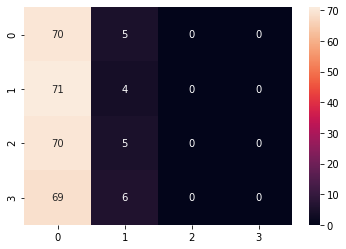

In [ ]:
y_pred_deep2 = np.argmax(model_deep2.predict(validation_generator), axis=-1)

print(classification_report(validation_generator.classes, y_pred_deep2))

cf_deep2 = confusion_matrix(validation_generator.classes, y_pred_deep2)

sns.heatmap(cf_deep2, annot=True)

In [ ]:
model_deep3 = Sequential()

model_deep3.add(Conv2D(64, (3,3), input_shape=input_shape))
model_deep3.add(Activation('relu'))

model_deep3.add(Conv2D(64, (3,3)))
model_deep3.add(Activation('relu'))

model_deep3.add(Conv2D(64, (3,3)))
model_deep3.add(Activation('relu'))
model_deep3.add(MaxPooling2D(pool_size=(2,2)))

model_deep3.add(Conv2D(128, (3,3)))
model_deep3.add(Activation('relu'))

model_deep3.add(Conv2D(128, (3,3)))
model_deep3.add(Activation('relu'))

model_deep3.add(Conv2D(128, (3,3)))
model_deep3.add(Activation('relu'))
model_deep3.add(MaxPooling2D(pool_size=(2,2)))

model_deep3.add(Conv2D(256, (3,3)))
model_deep3.add(Activation('relu'))

model_deep3.add(Conv2D(256, (3,3)))
model_deep3.add(Activation('relu'))

model_deep3.add(Conv2D(256, (3,3)))
model_deep3.add(Activation('relu'))
model_deep3.add(MaxPooling2D(pool_size=(2,2)))

model_deep3.add(Flatten())

model_deep3.add(Dense(1024, activation='relu'))

model_deep3.add(Dense(1024, activation='relu'))

model_deep3.add(Dense(1024, activation='relu'))

model_deep3.add(Dense(4, activation='softmax'))

model_deep3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
activation_16 (Activation)   (None, 148, 148, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 146, 146, 64)      36928     
_________________________________________________________________
activation_17 (Activation)   (None, 146, 146, 64)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 144, 144, 64)      36928     
_________________________________________________________________
activation_18 (Activation)   (None, 144, 144, 64)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 72, 72, 64)       

In [ ]:
model_deep3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_deep3.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=1
)

Epoch 1/10
10/10 [==============================] - 19s 2s/step - loss: 1.5706 - accuracy: 0.2512 - val_loss: 1.3830 - val_accuracy: 0.2500
Epoch 2/10
10/10 [==============================] - 18s 2s/step - loss: 1.3870 - accuracy: 0.2562 - val_loss: 1.3845 - val_accuracy: 0.2750
Epoch 3/10
10/10 [==============================] - 18s 2s/step - loss: 1.3865 - accuracy: 0.2612 - val_loss: 1.3821 - val_accuracy: 0.2625
Epoch 4/10
10/10 [==============================] - 18s 2s/step - loss: 1.3865 - accuracy: 0.2612 - val_loss: 1.3836 - val_accuracy: 0.2750
Epoch 5/10
10/10 [==============================] - 18s 2s/step - loss: 1.3869 - accuracy: 0.2450 - val_loss: 1.3871 - val_accuracy: 0.2250
Epoch 6/10
10/10 [==============================] - 18s 2s/step - loss: 1.3864 - accuracy: 0.2438 - val_loss: 1.3861 - val_accuracy: 0.2500
Epoch 7/10
10/10 [==============================] - 18s 2s/step - loss: 1.3867 - accuracy: 0.2450 - val_loss: 1.3852 - val_accuracy: 0.2625
Epoch 8/10
10/10 [==

              precision    recall  f1-score   support

           0       0.25      1.00      0.40        75
           1       0.00      0.00      0.00        75
           2       0.00      0.00      0.00        75
           3       0.00      0.00      0.00        75

    accuracy                           0.25       300
   macro avg       0.06      0.25      0.10       300
weighted avg       0.06      0.25      0.10       300



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


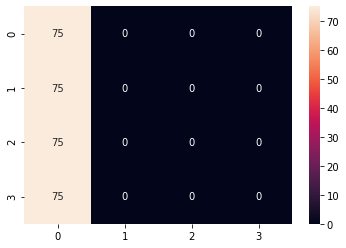

In [ ]:
y_pred_deep3 = np.argmax(model_deep3.predict(validation_generator), axis=-1)

print(classification_report(validation_generator.classes, y_pred_deep3))

cf_deep3 = confusion_matrix(validation_generator.classes, y_pred_deep3)

sns.heatmap(cf_deep3, annot=True)

### **Pre-trained models**

#### VGG16 Model

In [9]:
#Build a VGG16 neural network
from keras.applications.vgg16 import VGG16

model_vgg16 = Sequential()

VGG = VGG16(include_top=False, input_shape=input_shape, weights='imagenet')
for layer in VGG.layers:
  layer.trainable = False

model_vgg16.add(VGG)

model_vgg16.add(Flatten())
model_vgg16.add(Dense(64, activation='relu'))
model_vgg16.add(Dense(16, activation='relu'))
model_vgg16.add(Dense(4, activation='softmax'))

model_vgg16.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1605696   
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 68        
Total params: 16,321,492
Trainable params: 1,606,804
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
model_vgg16.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_vgg16.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=1
)

Epoch 1/10
20/20 [==============================] - 426s 21s/step - loss: 1.7949 - accuracy: 0.2612 - val_loss: 1.3224 - val_accuracy: 0.3250
Epoch 2/10
20/20 [==============================] - 65s 3s/step - loss: 1.3346 - accuracy: 0.3512 - val_loss: 1.3012 - val_accuracy: 0.3875
Epoch 3/10
20/20 [==============================] - 55s 3s/step - loss: 1.2611 - accuracy: 0.4181 - val_loss: 1.1439 - val_accuracy: 0.5375
Epoch 4/10
20/20 [==============================] - 53s 3s/step - loss: 1.1933 - accuracy: 0.4906 - val_loss: 1.1806 - val_accuracy: 0.4750
Epoch 5/10
20/20 [==============================] - 50s 2s/step - loss: 1.1431 - accuracy: 0.5250 - val_loss: 1.1726 - val_accuracy: 0.5500
Epoch 6/10
20/20 [==============================] - 51s 3s/step - loss: 1.1114 - accuracy: 0.5337 - val_loss: 1.0997 - val_accuracy: 0.4750
Epoch 7/10
20/20 [==============================] - 49s 2s/step - loss: 1.0834 - accuracy: 0.5487 - val_loss: 1.0604 - val_accuracy: 0.5500
Epoch 8/10
20/20 [

              precision    recall  f1-score   support

           0       0.21      0.28      0.24        75
           1       0.24      0.27      0.25        75
           2       0.19      0.19      0.19        75
           3       0.26      0.15      0.19        75

    accuracy                           0.22       300
   macro avg       0.22      0.22      0.22       300
weighted avg       0.22      0.22      0.22       300



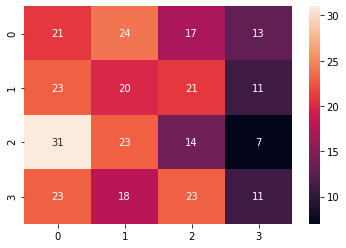

In [11]:
y_pred_vgg16 = np.argmax(model_vgg16.predict(validation_generator), axis=-1)

print(classification_report(validation_generator.classes, y_pred_vgg16))

cf_vgg16 = confusion_matrix(validation_generator.classes, y_pred_vgg16)

sns.heatmap(cf_vgg16, annot=True)

Examples of misclassified images with classification:

In [ ]:
i = np.where(validation_generator.classes==0)[0][0]
while validation_generator.classes[i] == 0 and validation_generator.classes[i] == y_pred_vgg16[i]:
  i += 1

print(f'This {cuisines[0]} food image was misclassified as {cuisines[y_pred_vgg16[i]]} food.')
img_path_wrong=validation_generator.filepaths[i]
Image.open(img_path_wrong)

In [ ]:
i = np.where(validation_generator.classes==1)[0][0]
while validation_generator.classes[i] == 1 and validation_generator.classes[i] == y_pred_vgg16[i]:
  i += 1

print(f'This {cuisines[1]} food image was misclassified as {cuisines[y_pred_vgg16[i]]} food.')
img_path_wrong=validation_generator.filepaths[i]
Image.open(img_path_wrong)

In [ ]:
i = np.where(validation_generator.classes==2)[0][0]
while validation_generator.classes[i] == 0 and validation_generator.classes[i] == y_pred_vgg16[i]:
  i += 1

print(f'This {cuisines[2]} food image was misclassified as {cuisines[y_pred_vgg16[i]]} food.')
img_path_wrong=validation_generator.filepaths[i]
Image.open(img_path_wrong)

In [ ]:
i = np.where(validation_generator.classes==3)[0][0]
while validation_generator.classes[i] == 0 and validation_generator.classes[i] == y_pred_vgg16[i]:
  i += 1

print(f'This {cuisines[3]} food image was misclassified as {cuisines[y_pred_vgg16[i]]} food.')
img_path_wrong=validation_generator.filepaths[i]
Image.open(img_path_wrong)

#### VGG19 Model

In [12]:
from keras.applications.vgg19 import VGG19

model_vgg19 = Sequential()

VGG_2 = VGG19(include_top=False, input_shape=input_shape, weights='imagenet')
for layer in VGG_2.layers:
  layer.trainable = False

model_vgg19.add(VGG_2)

model_vgg19.add(Flatten())
model_vgg19.add(Dense(64, activation='relu'))
model_vgg19.add(Dense(16, activation='relu'))
model_vgg19.add(Dense(4, activation='softmax'))

model_vgg19.summary()

80142336/80134624 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                1605696   
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 68        
Total params: 21,631,188
Trainable params: 1,606,804
Non-trainable params: 20,024,384
_________________________________________________________________


In [13]:
model_vgg19.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_vgg19.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=1
)

Epoch 1/10
20/20 [==============================] - 51s 3s/step - loss: 1.7402 - accuracy: 0.2912 - val_loss: 1.4045 - val_accuracy: 0.3125
Epoch 2/10
20/20 [==============================] - 49s 2s/step - loss: 1.2434 - accuracy: 0.4244 - val_loss: 1.0836 - val_accuracy: 0.5125
Epoch 3/10
20/20 [==============================] - 49s 2s/step - loss: 1.1586 - accuracy: 0.4931 - val_loss: 1.1138 - val_accuracy: 0.5375
Epoch 4/10
20/20 [==============================] - 49s 2s/step - loss: 1.0968 - accuracy: 0.5469 - val_loss: 1.0245 - val_accuracy: 0.6000
Epoch 5/10
20/20 [==============================] - 49s 2s/step - loss: 0.9997 - accuracy: 0.6056 - val_loss: 1.0002 - val_accuracy: 0.5250
Epoch 6/10
20/20 [==============================] - 49s 2s/step - loss: 0.9434 - accuracy: 0.6381 - val_loss: 1.1306 - val_accuracy: 0.5375
Epoch 7/10
20/20 [==============================] - 49s 2s/step - loss: 0.9420 - accuracy: 0.6219 - val_loss: 1.0700 - val_accuracy: 0.5125
Epoch 8/10
20/20 [==

              precision    recall  f1-score   support

           0       0.30      0.39      0.34        75
           1       0.18      0.08      0.11        75
           2       0.23      0.20      0.22        75
           3       0.26      0.36      0.30        75

    accuracy                           0.26       300
   macro avg       0.24      0.26      0.24       300
weighted avg       0.24      0.26      0.24       300



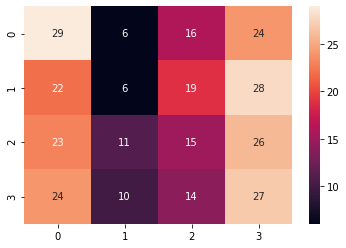

In [14]:
y_pred_vgg19 = np.argmax(model_vgg19.predict(validation_generator), axis=-1)

print(classification_report(validation_generator.classes, y_pred_vgg19))

cf_vgg19 = confusion_matrix(validation_generator.classes, y_pred_vgg19)

sns.heatmap(cf_vgg19, annot=True)

#### ResNet 50 Model

In [15]:
from keras.applications.resnet50 import ResNet50

model_res50 = Sequential()

res = ResNet50(include_top=False, input_shape=input_shape, weights='imagenet')
for layer in res.layers:
  layer.trainable = False

model_res50.add(res)

model_res50.add(Flatten())
model_res50.add(Dense(64, activation='relu'))
model_res50.add(Dense(16, activation='relu'))
model_res50.add(Dense(4, activation='softmax'))

model_res50.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                6422592   
_________________________________________________________________
dense_7 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 68        
Total params: 30,011,412
Trainable params: 6,423,700
Non-trainable params: 23,587,712
_________________________________________________________________


In [16]:
model_res50.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_res50.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=1
)

Epoch 1/10
20/20 [==============================] - 50s 2s/step - loss: 3.3118 - accuracy: 0.2444 - val_loss: 1.4821 - val_accuracy: 0.2250
Epoch 2/10
20/20 [==============================] - 48s 2s/step - loss: 1.3909 - accuracy: 0.2525 - val_loss: 1.3864 - val_accuracy: 0.2000
Epoch 3/10
20/20 [==============================] - 48s 2s/step - loss: 1.3863 - accuracy: 0.2500 - val_loss: 1.3869 - val_accuracy: 0.2000
Epoch 4/10
20/20 [==============================] - 48s 2s/step - loss: 1.3863 - accuracy: 0.2500 - val_loss: 1.3858 - val_accuracy: 0.3250
Epoch 5/10
20/20 [==============================] - 48s 2s/step - loss: 1.3863 - accuracy: 0.2344 - val_loss: 1.3865 - val_accuracy: 0.2375
Epoch 6/10
20/20 [==============================] - 49s 2s/step - loss: 1.3863 - accuracy: 0.2519 - val_loss: 1.3863 - val_accuracy: 0.1875
Epoch 7/10
20/20 [==============================] - 48s 2s/step - loss: 1.3863 - accuracy: 0.2500 - val_loss: 1.3866 - val_accuracy: 0.2125
Epoch 8/10
20/20 [==

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.00      0.00      0.00        75
           2       0.00      0.00      0.00        75
           3       0.25      1.00      0.40        75

    accuracy                           0.25       300
   macro avg       0.06      0.25      0.10       300
weighted avg       0.06      0.25      0.10       300



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


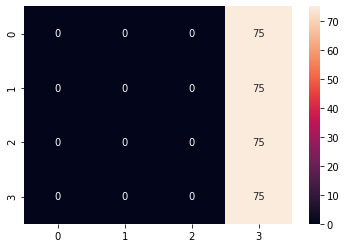

In [17]:
y_pred_res50 = np.argmax(model_res50.predict(validation_generator), axis=-1)

print(classification_report(validation_generator.classes, y_pred_res50))

cf_res50 = confusion_matrix(validation_generator.classes, y_pred_res50)

sns.heatmap(cf_res50, annot=True)

#### ResNet 50 version 2 Model (adds batch normalization to original ResNet 50 model)

In [18]:
from keras.applications.resnet_v2 import ResNet50V2

model_res50v2 = Sequential()

resv2 = ResNet50V2(include_top=False, input_shape=input_shape, weights='imagenet')
for layer in resv2.layers:
  layer.trainable = False

model_res50v2.add(resv2)

model_res50v2.add(Flatten())
model_res50v2.add(Dense(16, activation='relu'))
model_res50v2.add(Dense(16, activation='relu'))
model_res50v2.add(Dense(4, activation='softmax'))

model_res50v2.summary()

94674944/94668760 [==============================] - 1s 0us/step
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
flatten_3 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                1605648   
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 68        
Total params: 25,170,788
Trainable params: 1,605,988
Non-trainable params: 23,564,800
_________________________________________________________________


In [19]:
model_res50v2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_res50v2.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=1
)

Epoch 1/10
20/20 [==============================] - 49s 2s/step - loss: 2.4569 - accuracy: 0.3150 - val_loss: 1.3927 - val_accuracy: 0.4000
Epoch 2/10
20/20 [==============================] - 48s 2s/step - loss: 1.1994 - accuracy: 0.4669 - val_loss: 1.3009 - val_accuracy: 0.5500
Epoch 3/10
20/20 [==============================] - 47s 2s/step - loss: 0.9827 - accuracy: 0.6025 - val_loss: 1.3441 - val_accuracy: 0.5375
Epoch 4/10
20/20 [==============================] - 47s 2s/step - loss: 0.9473 - accuracy: 0.6037 - val_loss: 1.3659 - val_accuracy: 0.5250
Epoch 5/10
20/20 [==============================] - 47s 2s/step - loss: 0.8946 - accuracy: 0.6263 - val_loss: 1.1963 - val_accuracy: 0.5875
Epoch 6/10
20/20 [==============================] - 47s 2s/step - loss: 0.7710 - accuracy: 0.7075 - val_loss: 1.2469 - val_accuracy: 0.5625
Epoch 7/10
20/20 [==============================] - 48s 2s/step - loss: 0.7620 - accuracy: 0.7031 - val_loss: 1.2221 - val_accuracy: 0.5625
Epoch 8/10
20/20 [==

              precision    recall  f1-score   support

           0       0.23      0.31      0.27        75
           1       0.32      0.28      0.30        75
           2       0.25      0.17      0.20        75
           3       0.24      0.27      0.25        75

    accuracy                           0.26       300
   macro avg       0.26      0.26      0.26       300
weighted avg       0.26      0.26      0.26       300



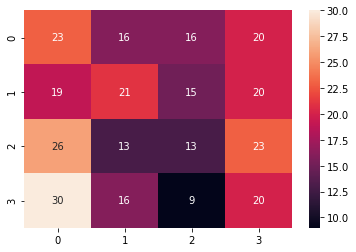

In [20]:
y_pred_res50v2 = np.argmax(model_res50v2.predict(validation_generator), axis=-1)

print(classification_report(validation_generator.classes, y_pred_res50v2))

cf_res50v2 = confusion_matrix(validation_generator.classes, y_pred_res50v2)

sns.heatmap(cf_res50v2, annot=True)

## **Visualize Convolutional Layers**

In [ ]:
img_path=validation_generator.filepaths[np.where(validation_generator.classes==0)[0][0]]
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model_res50v2.layers[0].layers[1:4]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = Model(inputs = model_res50v2.layers[0].input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(150, 150))
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model_res50v2.layers[0].layers[:4]]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = (feature_map.shape[-1]//8) +1  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features * 10, scale * 10) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [ ]:
img_path=validation_generator.filepaths[np.where(validation_generator.classes==1)[0][0]]
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model_res50v2.layers[0].layers[1:4]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = Model(inputs = model_res50v2.layers[0].input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(150, 150))
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model_res50v2.layers[0].layers[:4]]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = (feature_map.shape[-1]//8) +1  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features * 10, scale * 10) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [ ]:
img_path=validation_generator.filepaths[np.where(validation_generator.classes==2)[0][0]]
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model_res50v2.layers[0].layers[1:4]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = Model(inputs = model_res50v2.layers[0].input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(150, 150))
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model_res50v2.layers[0].layers[:4]]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = (feature_map.shape[-1]//8) +1  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features * 10, scale * 10) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [ ]:
img_path=validation_generator.filepaths[np.where(validation_generator.classes==3)[0][0]]
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model_res50v2.layers[0].layers[1:4]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = Model(inputs = model_res50v2.layers[0].input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(150, 150))
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model_res50v2.layers[0].layers[1:4]]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = (feature_map.shape[-1]//8) +1  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features * 10, scale * 10) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

# Results

Best model prediction: VGG16 model, 27% accuracy


In the VGG16 Model:

Worst predicted class: Italian food, most often misclassified as burgers or chinese

Pre-trained models performed better than manually built (and trained) models because the pre-trained models were trained on a much larger dataset (imagenet data), which made more robust extrapolation of general image features (eg edges, corners, shapes, etc). However, these features were not accurately correlated to the actual cuisines, even for pre-trained models. It is likely that the dataset was too small to accurately differentiate between images of different cuisines. Given the wide variety within each cuisine and the many overlapping features of different cuisines (noodles for both chinese and italian, sandwich shape for both burgers and mexican), this specific classification problem would require a much larger dataset than what was used. Additionally, the process used to extract images from Yelp may have given a skewed dataset, as the number of searches may have led to inclusion of restaurants that did not necessarily adhere to the specific cuisine. If possible, a much larger dataset that is manually labelled would produce more accurate results.

Once an adequately accurate model has been produced, next steps would be to further expand and refine the cuisine categories, possibly adding cuisines that are harder to differentiate (such as chinese vs vietnamese). To proceed towards the ultimate goal of predicting nutritional information of a meal through a picture, data on the ingredients list of each meal could be collected and a model developed that could use the picture and the cuisine classification to predict ingredients, or gather and predict nutritional information directly.